# About Dataset

The dataset is a customer dataset of a mall in which the maill collectes its customers data using the custiomers subscription information such as gender, age, annual income and sepending score(between 1-100).
Spending score is provided to the customer based on their spendind data and customer behaviour.
Based on the givenn attributes we are going to cluster the dataset using KMeans Clustering.

Problem Statement
Using the data set , we have to cluster the customers in such a way that every different category of customers could be identified so, that the marketing team could design marketing strategy based on the clusters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Exploratory Data Analysis:

Here, cusotmer ID is not a important features. SO, we would do EDA for other three columns.


In [5]:
#box plot to see the age and annual income statistics

<AxesSubplot:xlabel='Age'>

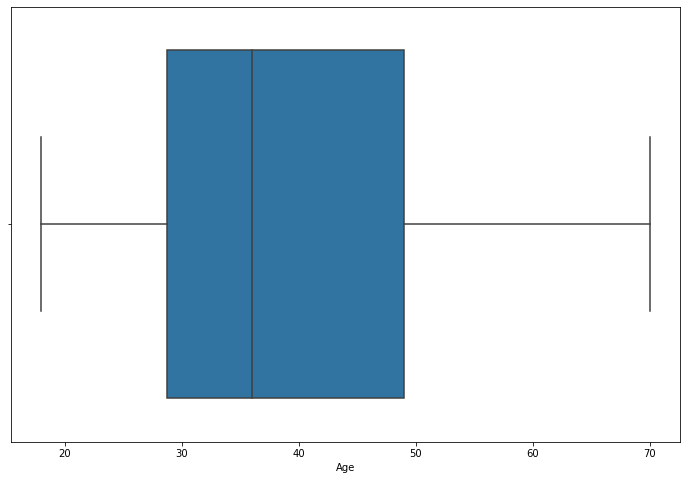

In [6]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Age'])

<AxesSubplot:xlabel='Annual Income (k$)'>

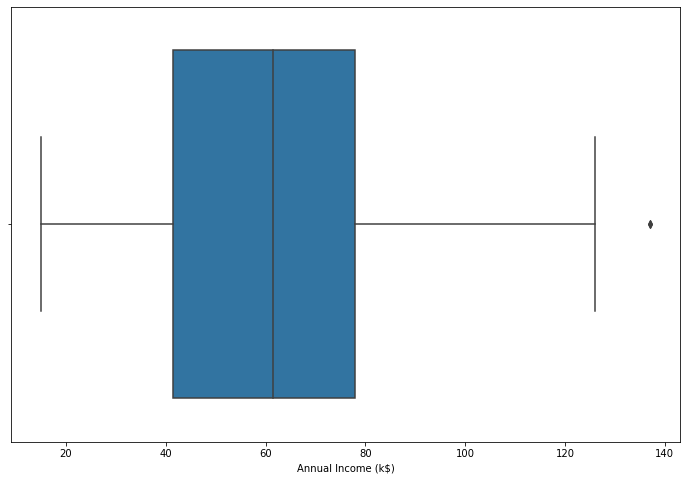

In [7]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Annual Income (k$)'])

In [8]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [9]:
#important libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #score for clustering performance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# standarizing the features

In [10]:
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features,columns=col_names)
scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


In [11]:
gender = df['Gender']
df2 = scaled_features.join(gender)
df2

,Annual Income (k$),Age,Spending Score (1-100),Gender
0,-1.738999,-1.424569,-0.434801,Male
1,-1.738999,-1.281035,1.195704,Male
2,-1.700830,-1.352802,-1.715913,Female
3,-1.700830,-1.137502,1.040418,Female
4,-1.662660,-0.563369,-0.395980,Female
...,...,...,...,...
195,2.268791,-0.276302,1.118061,Female
196,2.497807,0.441365,-0.861839,Female
197,2.497807,-0.491602,0.923953,Male
198,2.917671,-0.491602,-1.250054,Male


In [12]:
#ONe hot encoding to convert the gender to numeric
df2 = pd.get_dummies(df2, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
df2.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female,Gender_Male
0,-1.738999,-1.424569,-0.434801,0,1
1,-1.738999,-1.281035,1.195704,0,1
2,-1.700830,-1.352802,-1.715913,1,0
3,-1.700830,-1.137502,1.040418,1,0
4,-1.662660,-0.563369,-0.395980,1,0


In [13]:
df2 = df2.drop('Gender_Male',axis=1)
df2.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1


In [14]:
#It indicates that the 0 is male and 1 is Female

# Building the clustering model

In [15]:
SSE=[]
for k in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = k, init='k-means++')
    kmeans.fit(df2)
    SSE.append(kmeans.inertia_)
SSE

C:\Users\Padam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Padam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Padam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Padam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated i

[649.2800000000002,
 438.5224115567773,
 344.40542886953494,
 254.28290726083466,
 216.78490151651044,
 181.9514362434146,
 165.43613548426075,
 150.28096075469244,
 139.5733744178152]

Text(0, 0.5, 'Inertia')

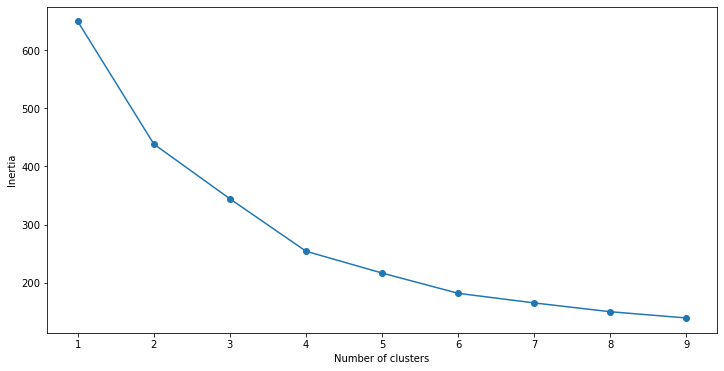

In [16]:
#converting the result into dataframe and plotting them(ELBOW Method)
fr = pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(fr['Cluster'], fr['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [17]:
#It shows the optimal number of cluster is 4

In [18]:
#Evaluating clustering performance,building model with 4 cluster and evaluating the silhouette score of the model

kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(df2)

# Now, print the silhouette score of this model

print(silhouette_score(df2, kmeans.labels_, metric='euclidean'))

0.35027020434653977


C:\Users\Padam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [19]:
#the score is 0.35 but also its not bad model, we can further improve the score. BUt, lets see first how the cluster looks like

C:\Users\Padam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


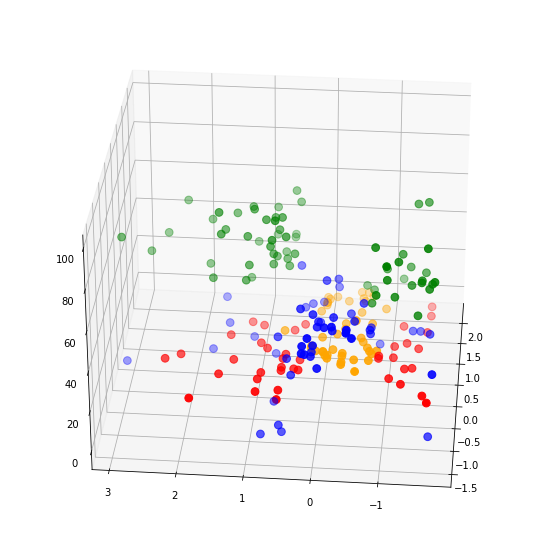

In [20]:
clusters = kmeans.fit_predict(df2.iloc[:,1:])
df2["label"] = clusters
 
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df["Spending Score (1-100)"][df2.label == 0], c='blue', s=60)

ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='red', s=60)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df["Spending Score (1-100)"][df2.label == 2], c='green', s=60)
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

In [21]:
#the model is not separrating the clusters clearly so, lets do futher PCA analysis to obtain clear picture

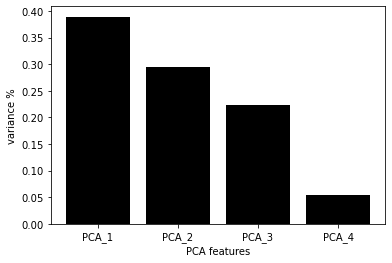

In [22]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df2)

features = ['PCA_1','PCA_2','PCA_3','PCA_4',]
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents,columns=features)

In [23]:
PCA_components.head()

,PCA_1,PCA_2,PCA_3,PCA_4
0,-1.943094,-0.245698,-1.873078,0.677865
1,0.172322,-1.716805,-1.755533,0.714807
2,-2.249187,0.779079,-1.901391,-0.302313
3,0.193232,-1.545308,-1.750629,-0.290419
4,-1.501049,0.194379,-1.773587,-0.387278


In [24]:
pca.explained_variance_ratio_

array([0.38899991, 0.29484429, 0.22354381, 0.05464779])

In [25]:
# WE observe that the three components comprised almost 95% of the datasets so,lets build model using these 3 components


C:\Users\Padam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


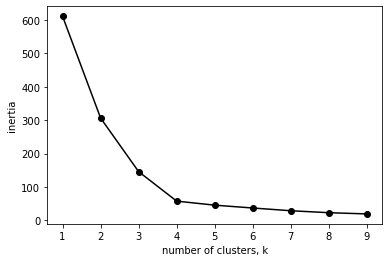

In [26]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [27]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:4])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:4], model.labels_, metric='euclidean'))

0.41644079660565786


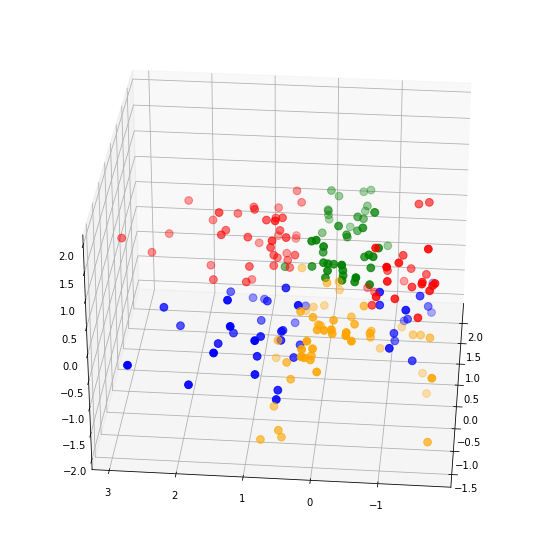

In [28]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:4])
df2["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='blue', s=60)
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='red', s=60)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='green', s=60)

ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

In [30]:
df = pd.read_csv('Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

# map back clusters to dataframe

pred = model.predict(PCA_components.iloc[:,:4])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,3
3,Female,23,16,77,1
4,Female,31,17,40,3


In [32]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df


,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,46.976190,71.333333,17.404762
1,1,30.079365,63.841270,80.476190
2,2,56.333333,54.266667,49.066667
3,3,27.340000,53.040000,40.620000


<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

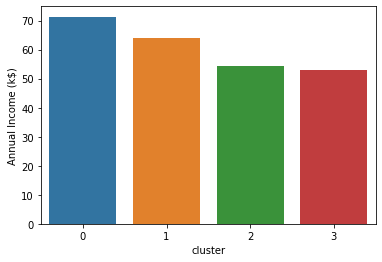

In [33]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

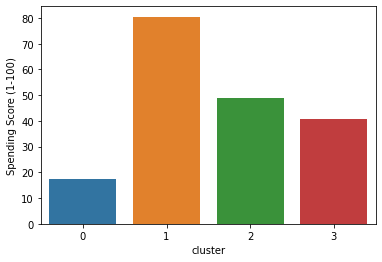

In [34]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Age'>

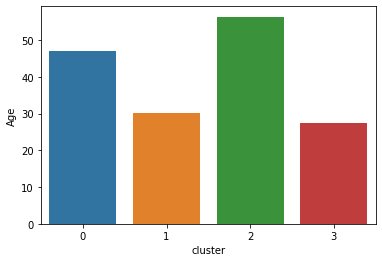

In [35]:
sns.barplot(x='cluster',y='Age',data=avg_df)

In [37]:
df3 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
df3

Gender
cluster Gender        
0       Female      20
        Male        22
1       Female      35
        Male        28
2       Female      26
        Male        19
3       Female      31
        Male        19

Cluster 0:

High average annual income, low spending.
Mean age is around 40 and gender is predominantly male.

Cluster 1:

Low to mid average income, average spending capacity.
Mean age is around 50 and gender is predominantly female.

Cluster 2:

Low average income, high spending score.
Mean age is around 25 and gender is predominantly female.

Cluster 3:

High average income, high spending score.
Mean age is around 30 and gender is predominantly female.
It is important to note that calculating the median age would provide better insight on the distribution 
of age within each cluster.

Also, females are more highly represented in the entire dataset, which is why most 
clusters contain a larger number of females than males. We can find the percentage of each 
gender relative to the numbers in the entire dataset to give us a better idea of gender distribution.

Cluster 0: The frugal spender
This persona comprises of middle aged individuals who are very careful with money.

Despite having the highest average income compared to individuals in all other clusters, they spend the least.

This might be because they have financial responsibilities — like saving up for their kid’s higher education.

Recommendation: Promos, coupons, and discount codes will attract individuals in this segment due to their tendency to spend less.

Cluster 1: Almost retired
This segment comprises of an older group of people.

They earn less and spend less, and are probably saving up for retirement.

Recommendation: Marketing to these individuals can be done through Facebook, which appeals to an older demographic. Promote healthcare related products to people in this segment.

Cluster 2: The careless buyer
This segment is made up of a younger age group.

Individuals in this segment are most likely first jobbers. They make the least amount of money compared to all other segments.

However, they are very high spenders.

These are enthusiastic young individuals who enjoy living a good lifestyle, and tend to spend above their means.

Recommendation: Since these are young individuals who spend a lot, providing them with travel coupons or hotel discounts might be a good idea. Providing them with discounts off top clothing and makeup brands would also work well for this segment.

Cluster 3: Highly affluent individuals
This segment is made up of middle-aged individuals.

These are individuals who have worked hard to build up a significant amount of wealth.

They also spend large amounts of money to live a good lifestyle.

These individuals have likely just started a family, and are leading baby or family-focused lifestyles. It is a good idea to promote baby or child related products to these individuals.

Recommendation: Due to their large spending capacity and their demographic, these individuals are likely to be looking for properties to buy or invest in. They are also more likely than all other segments to take out housing loans and make serious financial commitments.

Conclusion
We have successfully built a K-Means clustering model for customer segmentation. We also explored cluster interpretation, and analyzed the behaviour of individuals in each cluster.

Finally, we took a look at some business recommendations that could be provided based on the attributes of each individual in the cluster.

You can use the analysis above as starter code for any clustering or segmentation project in the future.